In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Đọc dữ liệu từ file JSON
with open('data/data_movies.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Chuyển đổi sang DataFrame
df = pd.DataFrame.from_dict(data, orient='index')


In [2]:
df.describe()

,episodes
count,865.000000
mean,22.129480
std,69.005615
min,0.000000
25%,8.000000
50%,12.000000
75%,14.000000
max,1131.000000


In [3]:
df.info()
df.isnull().sum()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, Fairy Tail: 100 Years Quest to Tinh Vực Bốn Vạn Năm
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         865 non-null    object
 1   genre         865 non-null    object
 2   rating        865 non-null    object
 3   status        865 non-null    object
 4   episodes      865 non-null    int64 
 5   release year  865 non-null    object
 6   description   865 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.1+ KB


title           0
genre           0
rating          0
status          0
episodes        0
release year    0
description     0
dtype: int64

In [4]:
df['rating_score'] = df['rating'].apply(lambda x: float(x[0]) if isinstance(x, list) and len(x) > 0 else None)
df['rating_count'] = df['rating'].apply(lambda x: int(x[1]) if isinstance(x, list) and len(x) > 1 else None)
df['release year'] = pd.to_numeric(df['release year'], errors='coerce')
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['genre'] = df['genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [5]:

df['rating'].fillna(0, inplace=True)  # Điền bằng 0 nếu muốn mặc địn

C:\Users\hp\AppData\Local\Temp\ipykernel_11672\1163766498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0, inplace=True)  # Điền bằng 0 nếu muốn mặc địn


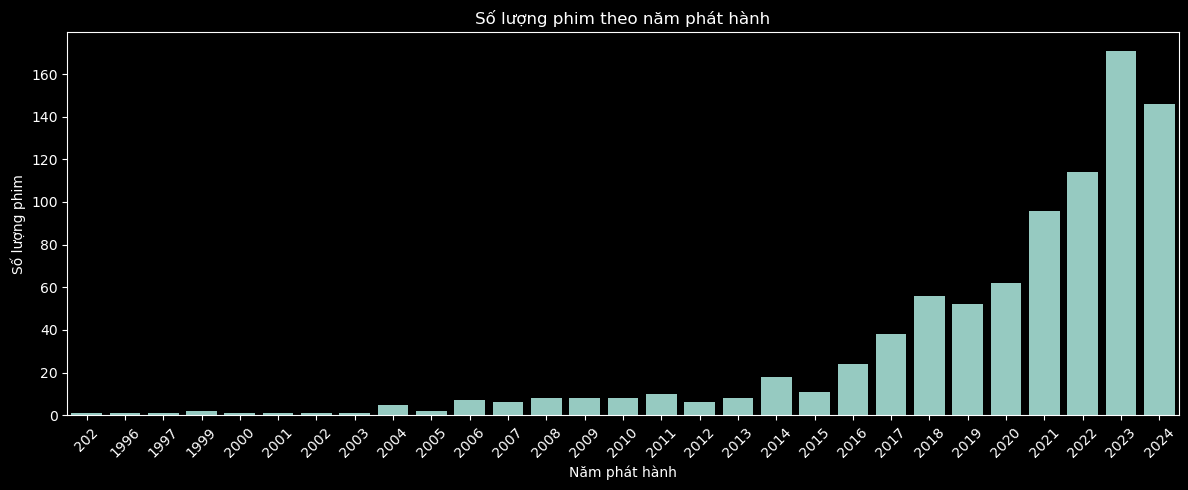

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release year', order=sorted(df['release year'].dropna().unique()))
plt.title('Số lượng phim theo năm phát hành')
plt.xlabel('Năm phát hành')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


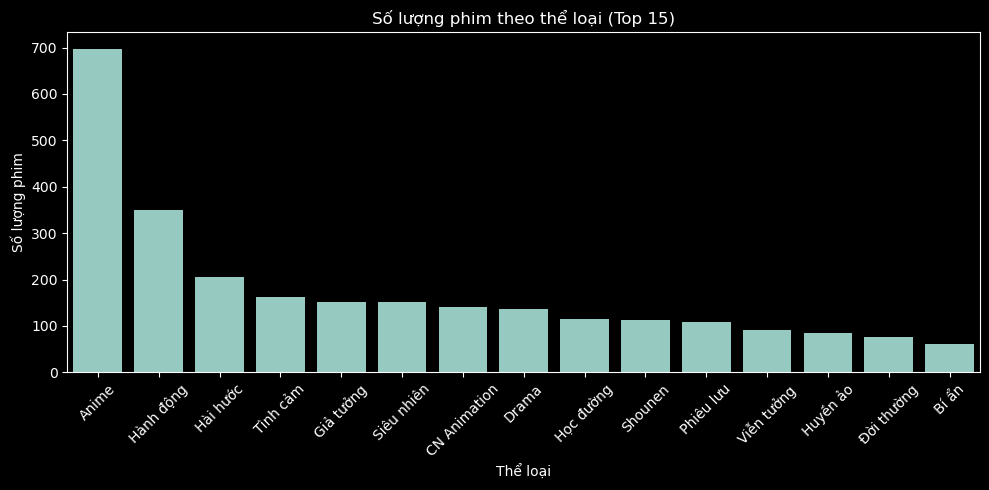

In [7]:
all_genres = ', '.join(df['genre'].dropna()).split(', ')
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(15)  # Lấy 15 thể loại phổ biến nhất
genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Số lượng phim theo thể loại (Top 15)')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

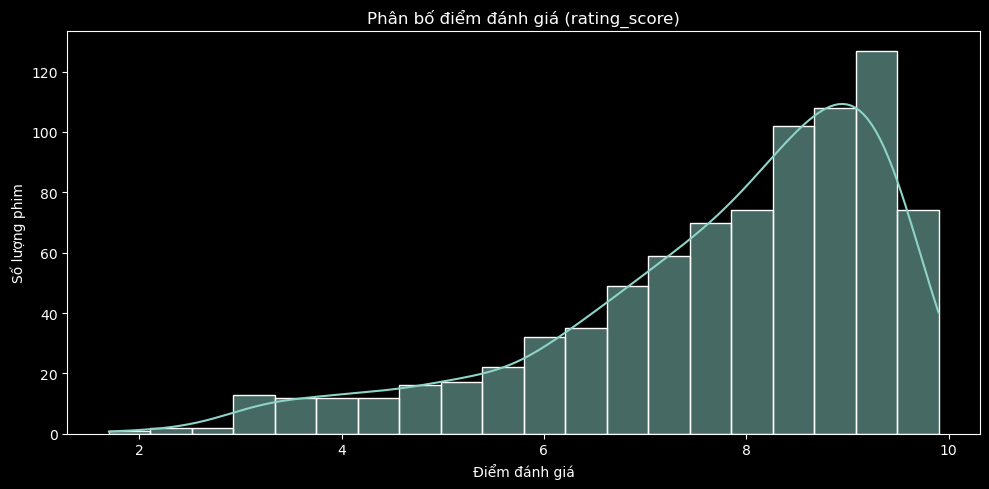

Top 10 phim có điểm đánh giá cao nhất (>= 50 lượt đánh giá):
                                                                                                title  \
KOUTETSUJOU NO KABANERI MOVIE: UNATO KESSEN               KOUTETSUJOU NO KABANERI MOVIE: UNATO KESSEN   
Code Geass: Fukkatsu no Lelouch | Code Geass: L...  Code Geass: Fukkatsu no Lelouch | Code Geass: ...   
Họa Giang Hồ Chi Thiên Cang                                               Họa Giang Hồ Chi Thiên Cang   
Kaguya-sama wa Kokurasetai?: Tensai-tachi no Re...  Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...   
Kimetsu no Yaiba                                                                     Kimetsu no Yaiba   
Saenai Heroine no Sodatekata Fine                                   Saenai Heroine no Sodatekata Fine   
Kimetsu no Yaiba : Mugen Ressha-hen                               Kimetsu no Yaiba : Mugen Ressha-hen   
Kizumonogatari III: Reiketsu-hen                                     Kizumonogatari III: Reiketsu-h

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['rating_score'].dropna(), bins=20, kde=True)
plt.title('Phân bố điểm đánh giá (rating_score)')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng phim')
plt.tight_layout()
plt.show()

top_movies = df[df['rating_count'] >= 50].sort_values(by='rating_score', ascending=False).head(10)
print("Top 10 phim có điểm đánh giá cao nhất (>= 50 lượt đánh giá):")
print(top_movies[['title', 'rating_score', 'rating_count']])


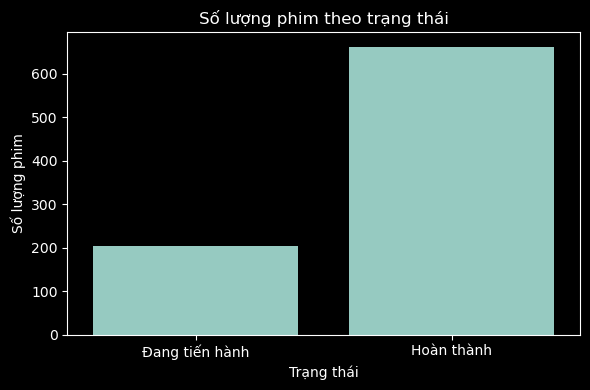

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='status')
plt.title('Số lượng phim theo trạng thái')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng phim')
plt.tight_layout()
plt.show()


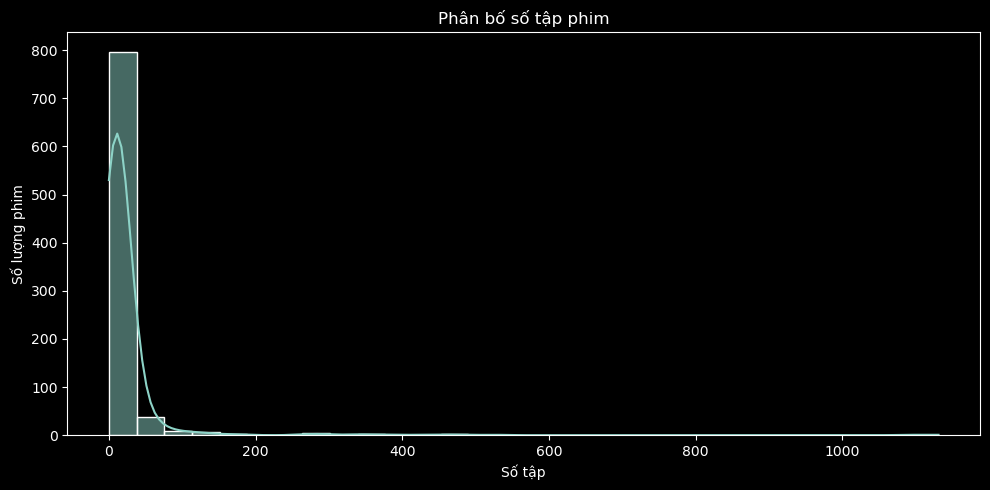

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['episodes'].dropna(), bins=30, kde=True)
plt.title('Phân bố số tập phim')
plt.xlabel('Số tập')
plt.ylabel('Số lượng phim')
plt.tight_layout()
plt.show()
